# Employee Salary 



Uncover the factors that lead to employee attrition and explore important drivers of employee attrition.

In [1]:
import pandas as pd
import seaborn as sns
import random
import math
import matplotlib.pyplot as plt 
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix,precision_score,recall_score,precision_recall_curve,plot_precision_recall_curve,f1_score,accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn import tree
from matplotlib_venn import venn3
import numpy as np
from scipy import stats
# selection of algorithms to consider and set performance measure
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from scipy.stats import mannwhitneyu
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import gower
from scipy.stats import randint as sp_randint
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

'C:\\Users\\Vahid\\OneDrive - University of Toronto\\MMA - 2022 -\\Jupyter files\\HR'

In [2]:
#path = '/Users/Vahid/Library/CloudStorage/OneDrive-UniversityofToronto/MMA - 2022 -/Jupyter files/Data/'
path = 'C:\\Users\\Vahid\\OneDrive - University of Toronto\\MMA - 2022 -\\Jupyter files\\DATA\\'
data = pd.read_csv(path+'attrition.csv')
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life_Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research_Development,8,Below_College,Life_Sciences,High,Male,...,Outstanding,Very_High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research_Development,2,College,Other,Very_High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research_Development,3,Master,Life_Sciences,Very_High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research_Development,2,Below_College,Medical,Low,Male,...,Excellent,Very_High,1,6,3,Better,2,2,2,2


# Q1. Summarize data to understand average monthly income distribution among different group (use intuition) 


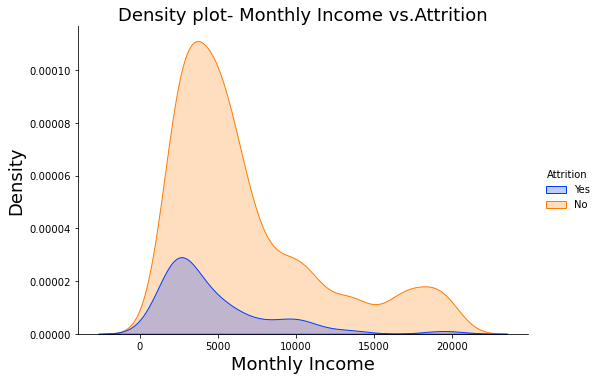

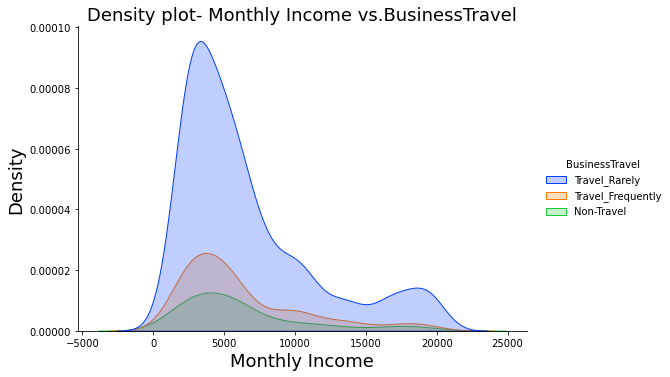

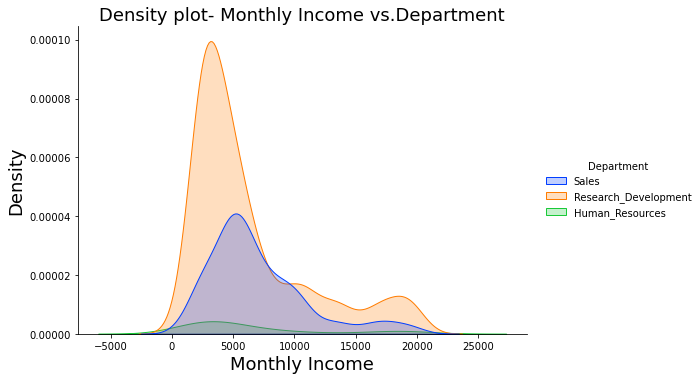

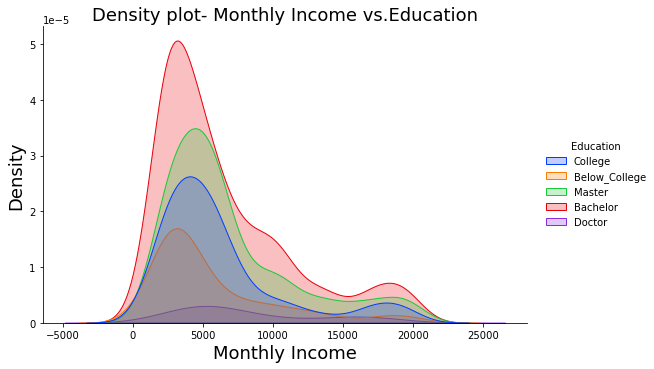

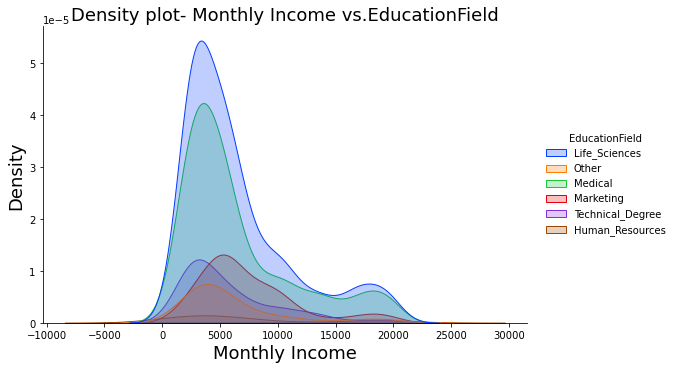

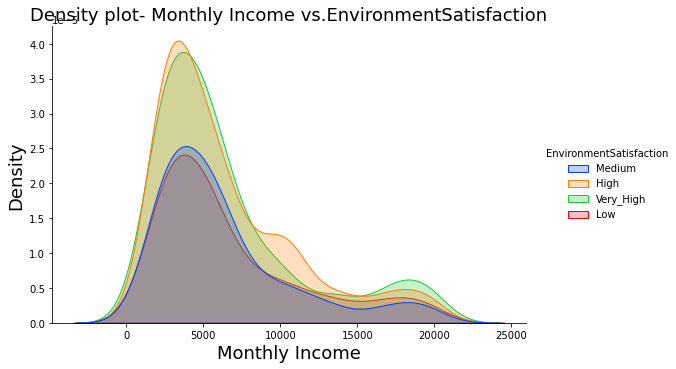

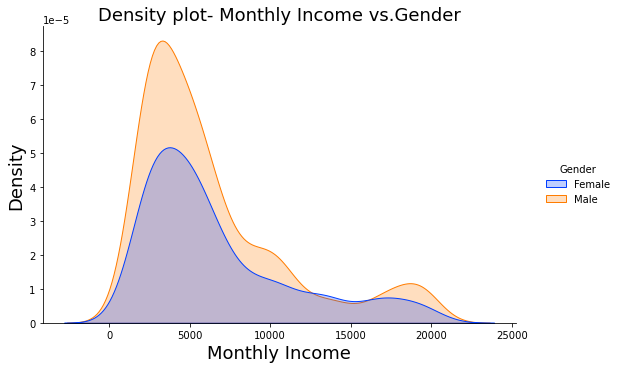

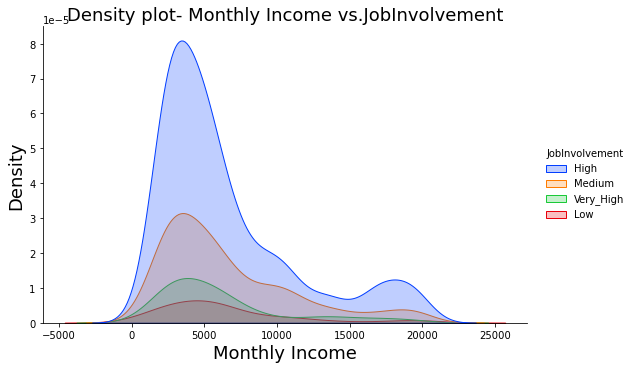

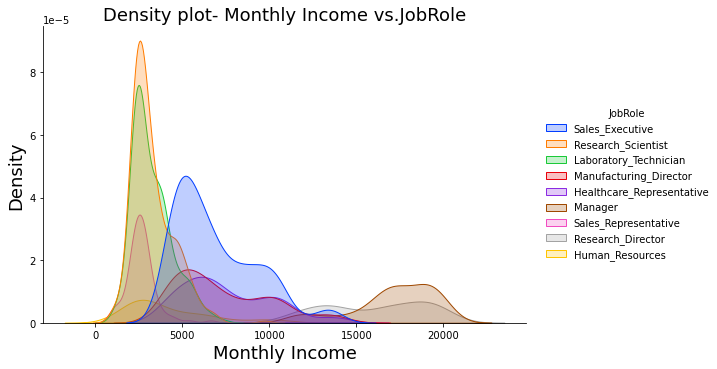

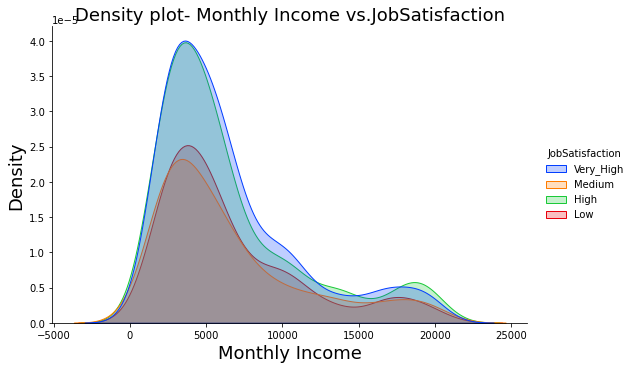

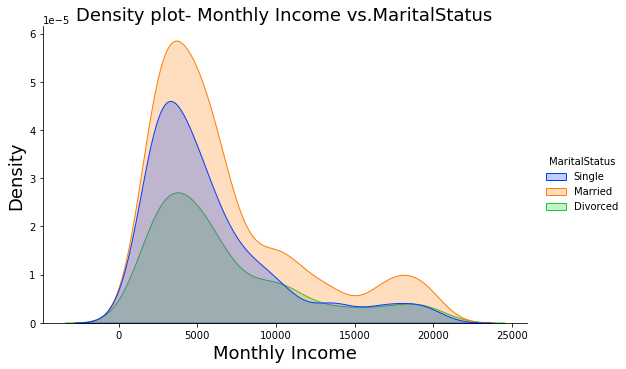

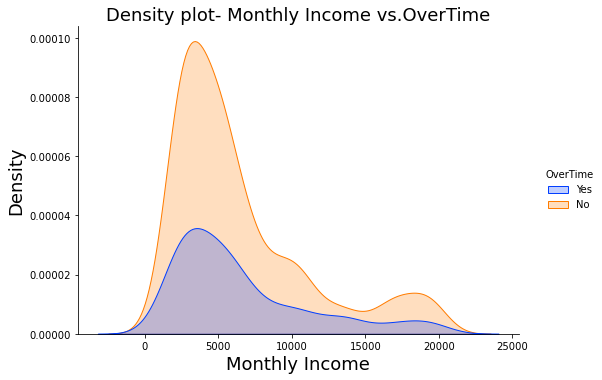

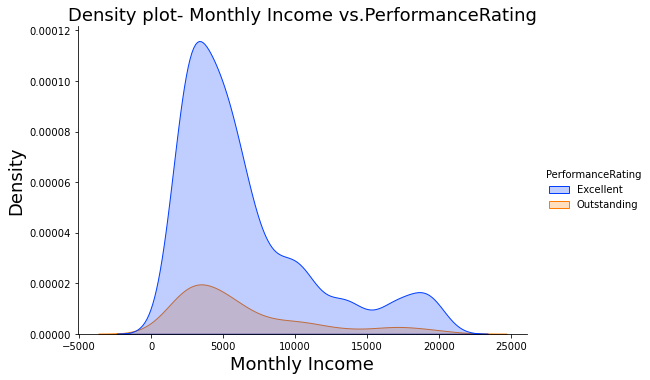

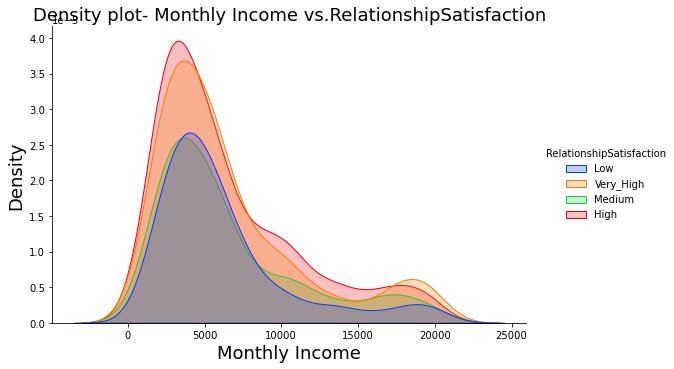

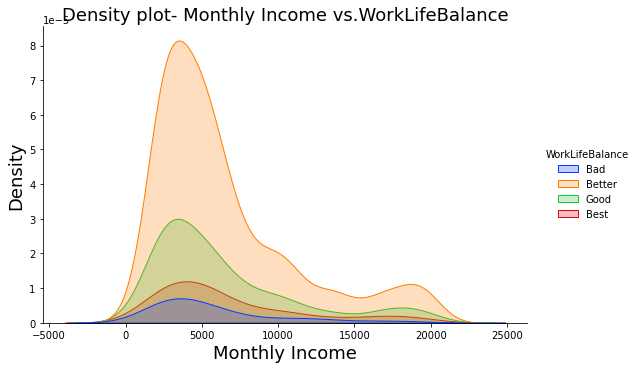

In [3]:
for col in data.describe(include=['object']).columns:    
    sns.displot(data=data, x='MonthlyIncome', hue=col, kind='kde', fill=True, palette=sns.color_palette('bright')[:len(data[col].unique())], height=5, aspect=1.5)
    plt.xlabel('Monthly Income', fontsize=18)
    plt.ylabel('Density', fontsize=18)
    plt.title('Density plot- Monthly Income vs.{}'.format(col), fontsize=18)
    plt.show()
    


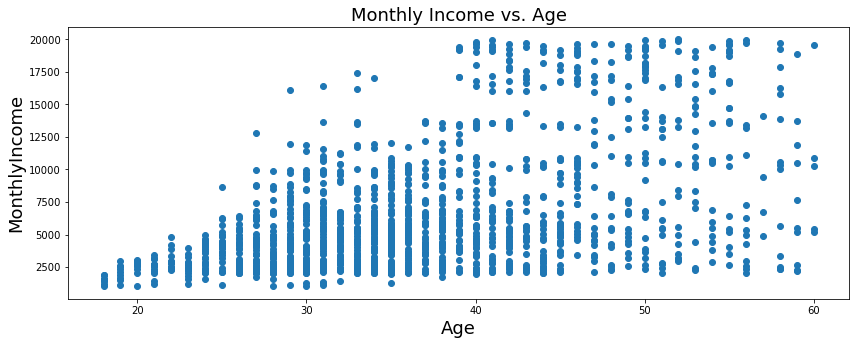

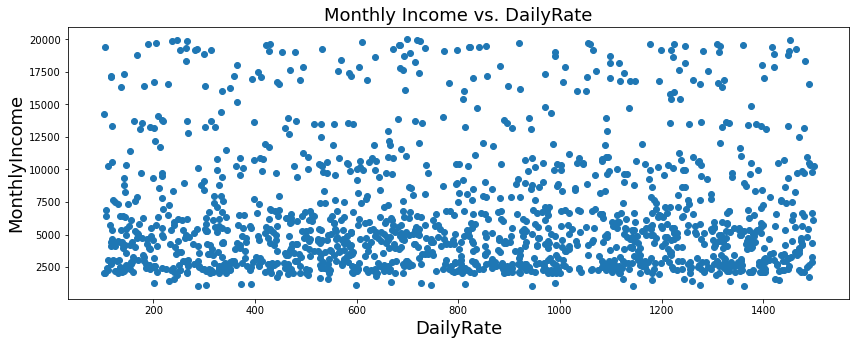

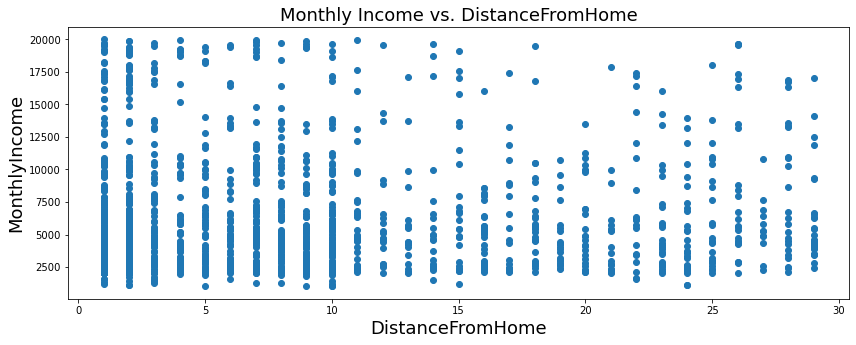

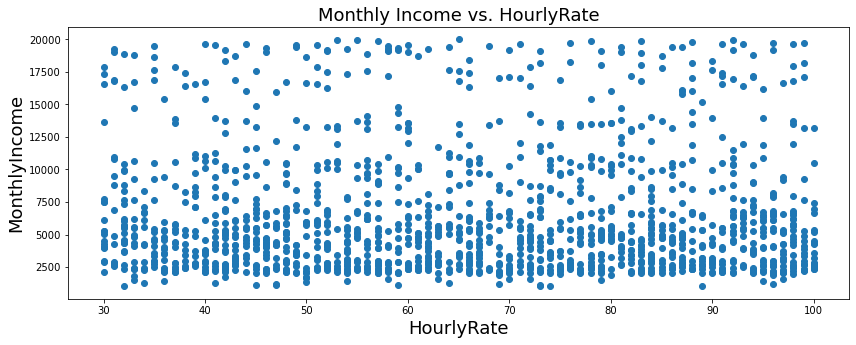

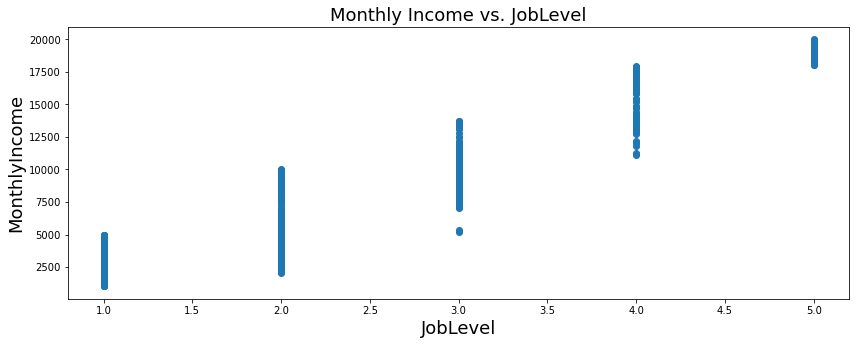

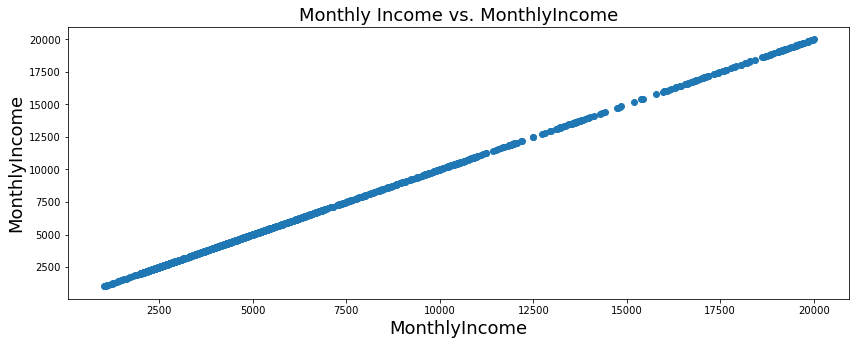

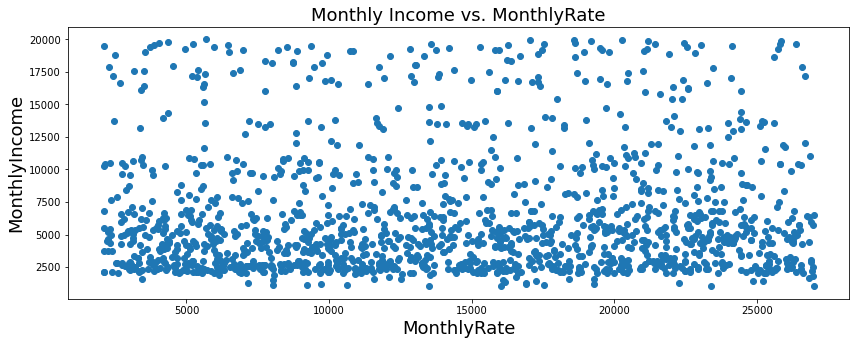

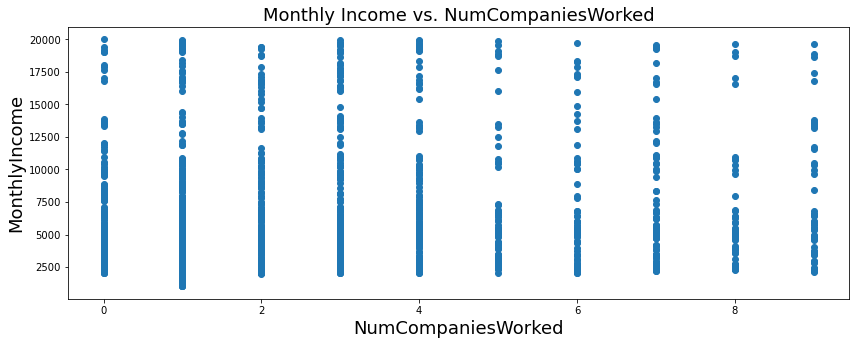

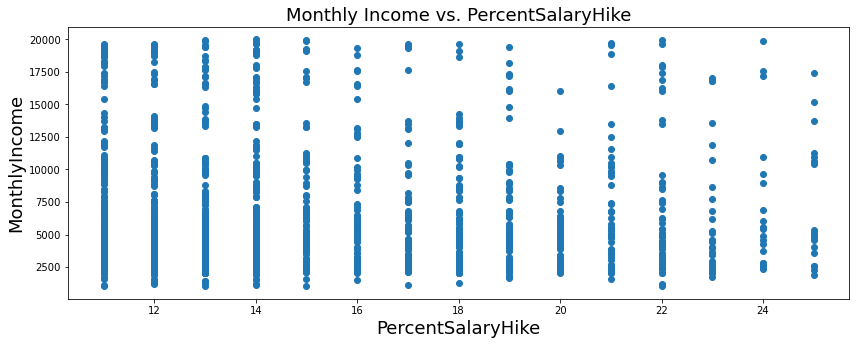

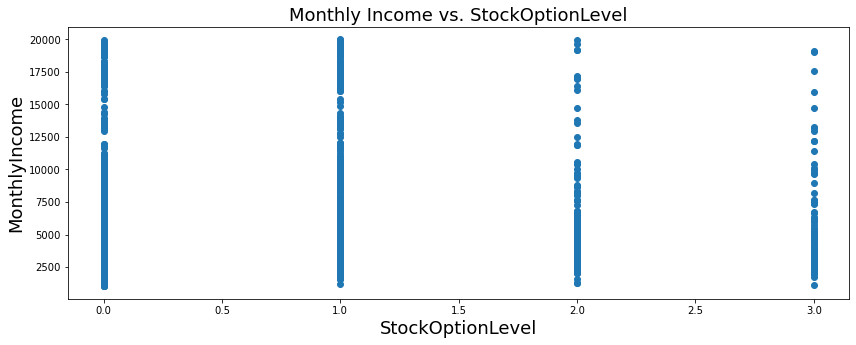

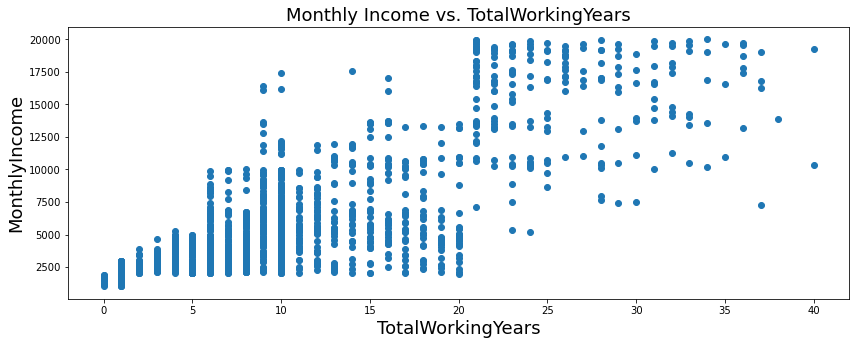

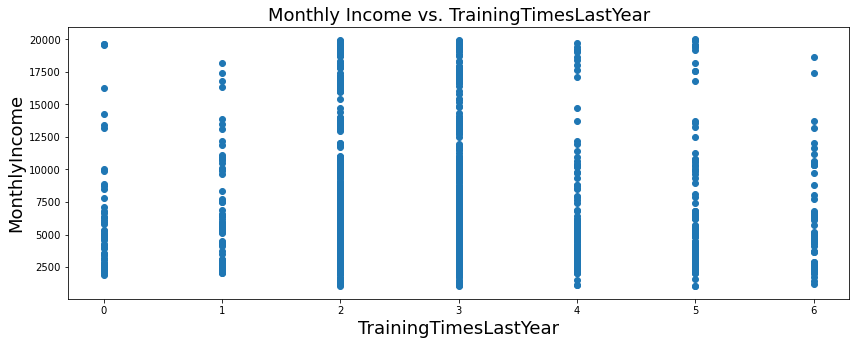

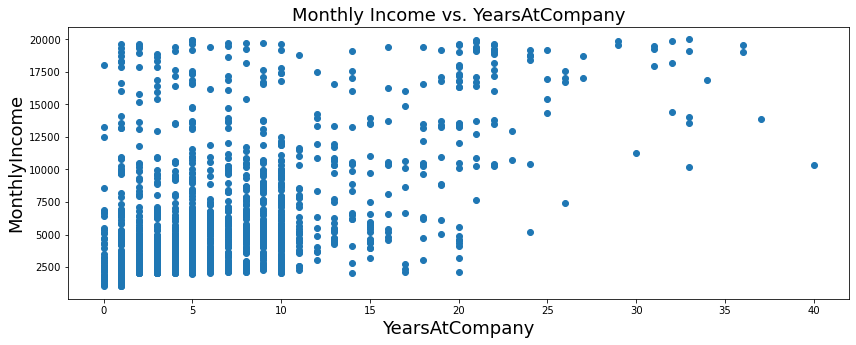

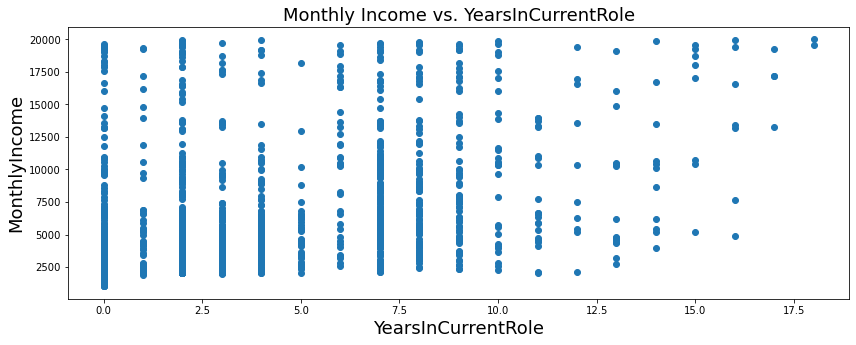

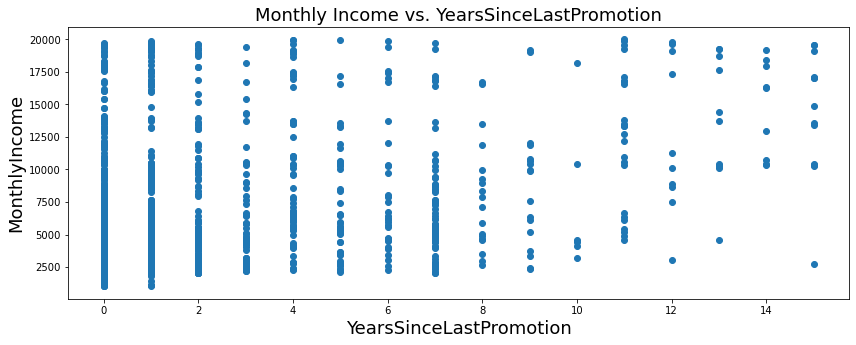

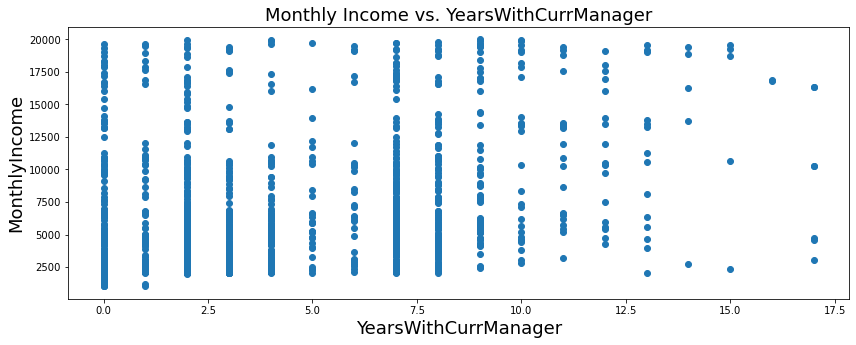

In [4]:
for col in data.describe().columns:    
    fig = plt.figure(figsize=(14, 5))
    plt.scatter(data[col], data['MonthlyIncome'])
    plt.ylabel("MonthlyIncome", fontsize=18)
    plt.xlabel(col, fontsize=18)
    plt.title("Monthly Income vs. {}".format(col), fontsize=18)
    plt.show()

# Q2. Does the dataset contain outliers? If yes, take appropriate measures to deal with them.

#### Gower Distance Calculation 

In [30]:
#from sklearn.preprocessing import StandardScaler
#data[data.describe().columns] = StandardScaler().fit_transform(data[data.describe().columns])

In [31]:
dist_matrix = gower.gower_matrix(data)
pd.DataFrame(dist_matrix)

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
0,0.000000,0.604311,0.393363,0.437454,0.502914,0.389003,0.515494,0.560299,0.598139,0.512184,...,0.466525,0.465031,0.420631,0.489146,0.458030,0.531352,0.521188,0.478494,0.483106,0.452236
1,0.604311,0.000000,0.538470,0.377432,0.340141,0.416798,0.476986,0.363880,0.292004,0.444611,...,0.455266,0.524533,0.484294,0.417547,0.459303,0.349904,0.316214,0.337629,0.313736,0.436487
2,0.393363,0.538470,0.000000,0.393252,0.403321,0.358641,0.445662,0.339413,0.416902,0.435006,...,0.375216,0.372861,0.614308,0.422453,0.339331,0.415678,0.422949,0.420528,0.471117,0.380093
3,0.437454,0.377432,0.393252,0.000000,0.394444,0.287922,0.464753,0.375269,0.417518,0.434464,...,0.370767,0.516280,0.526953,0.457220,0.363731,0.390882,0.413862,0.447733,0.414876,0.412077
4,0.502914,0.340141,0.403321,0.394444,0.000000,0.371330,0.437049,0.330549,0.502798,0.347550,...,0.409887,0.471950,0.487714,0.378444,0.392183,0.294024,0.272641,0.392203,0.356818,0.285393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.531352,0.349904,0.415678,0.390882,0.294024,0.287980,0.383562,0.381691,0.402234,0.334858,...,0.416697,0.466418,0.461669,0.391552,0.464314,0.000000,0.329083,0.415910,0.356329,0.287915
1466,0.521188,0.316214,0.422949,0.413862,0.272641,0.419556,0.433738,0.403505,0.365068,0.334947,...,0.340297,0.357555,0.367773,0.343776,0.393858,0.329083,0.000000,0.439932,0.328642,0.307653
1467,0.478494,0.337629,0.420528,0.447733,0.392203,0.470991,0.367996,0.345343,0.317241,0.439637,...,0.461867,0.461210,0.539551,0.294552,0.478652,0.415910,0.439932,0.000000,0.456851,0.314868
1468,0.483106,0.313736,0.471117,0.414876,0.356818,0.328464,0.453259,0.500555,0.377220,0.348333,...,0.397672,0.389810,0.371127,0.386103,0.345999,0.356329,0.328642,0.456851,0.000000,0.336378


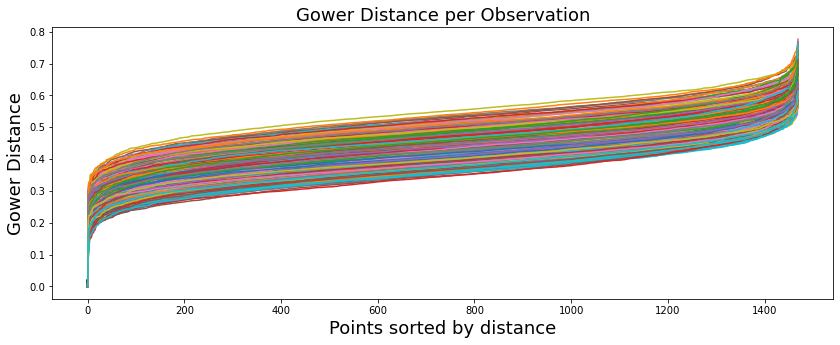

In [32]:
## Each line represents one row in data table(employee)
fig = plt.figure(figsize=(14, 5))
for i in range(data.shape[0]):   
    plt.plot(np.sort(dist_matrix[:,i]))
    plt.xlabel('Points sorted by distance', fontsize=18)
    plt.ylabel('Gower Distance', fontsize=18)
    plt.title('Gower Distance per Observation', fontsize=18)
plt.show()

In [33]:
def my_silhouette_score(D,labels):
    # Initialize arrays to store silhouette coefficients and cluster sizes
    s = np.zeros(D.shape[0])
    sizes = np.zeros(np.max(labels) + 1)

    # Compute cluster sizes
    for i in range(len(labels)):
        sizes[labels[i]] += 1

    # Loop over each sample
    for i in range(len(labels)):
        # Get cluster label of current sample
        label = labels[i]

        # Compute mean distance to all other samples in same cluster
        a = np.mean(D[i, labels == label])

        # Compute mean distance to all samples in nearest neighboring cluster
        if len(sizes)>1:
            b = np.min([np.mean(D[i, labels == j]) for j in range(len(sizes)) if j != label])
        else:
            b = 1

        # Compute silhouette coefficient for current sample
        s[i] = (b - a) / max(a, b)    
        # Compute average silhouette coefficient
        avg_silhouette = np.mean(s)
    return avg_silhouette


### Tune hyperparameter of DBSCAN using Silhouette Score

In [34]:
from sklearn.metrics import silhouette_score

eps_values = np.linspace(0.1, .8, 50)
min_samples_values = range(2, 10)

# find the optimal parameters using the Silhouette Score
best_score_m = -1
best_score_s = -1
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric = "precomputed",n_jobs=3)
        db = dbscan.fit(dist_matrix)
        if len(set(db.labels_)) > 1:
            score_sklearn = silhouette_score(dist_matrix, db.labels_)
            score_mine = my_silhouette_score(dist_matrix, db.labels_)
            if score_mine > best_score_m:
                best_score_m = score_mine
                best_eps_m = eps
                best_min_samples_m = min_samples
                
            if score_sklearn > best_score_s:
                best_score_s = score_sklearn
                best_eps_s = eps
                best_min_samples_s = min_samples                

In [35]:
# print the optimal parameters and the corresponding Silhouette Score
print(f"Optimal eps: {best_eps_m}")
print(f"Optimal min_samples: {best_min_samples_m}")
print(f"Silhouette Score Akram: {best_score_m}")

Optimal eps: 0.2142857142857143
Optimal min_samples: 9
Silhouette Score Akram: 0.5936310882471045


Estimated number of clusters: 1
Estimated number of noise points: 615


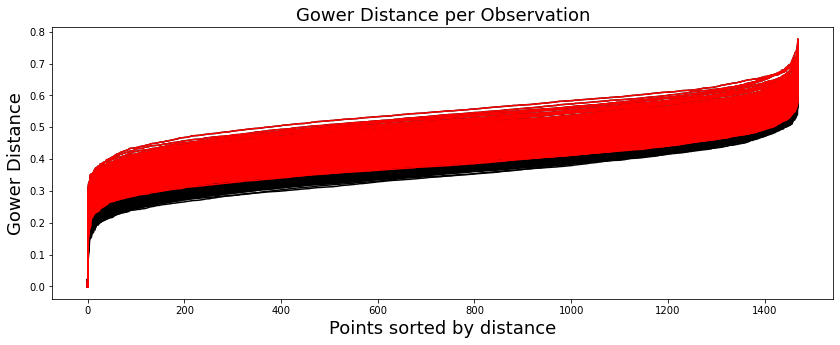

In [89]:
db = DBSCAN(eps = best_eps_m, min_samples = best_min_samples_m, metric = "precomputed").fit(dist_matrix)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


fig = plt.figure(figsize=(14, 5))

for i in range(data.shape[0]):   
    plt.plot(np.sort(dist_matrix[:,i]),color='black')
    plt.xlabel('Points sorted by distance', fontsize=18)
    plt.ylabel('Gower Distance', fontsize=18)
    plt.title('Gower Distance per Observation', fontsize=18)


for i in list(np.where(labels==-1)[0]):
    plt.plot(np.sort(dist_matrix[:,i]),color='red')
plt.show()


In [37]:
# print the optimal parameters and the corresponding Silhouette Score
print(f"Optimal eps: {best_eps_s}")
print(f"Optimal min_samples: {best_min_samples_s}")
print(f"Silhouette Score Sklearn: {best_score_s}")

Optimal eps: 0.3142857142857143
Optimal min_samples: 4
Silhouette Score Sklearn: 0.37868112325668335


In [63]:
db = DBSCAN(eps = best_eps_s, min_samples = best_min_samples_s, metric = "precomputed").fit(dist_matrix)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 1
Estimated number of noise points: 1


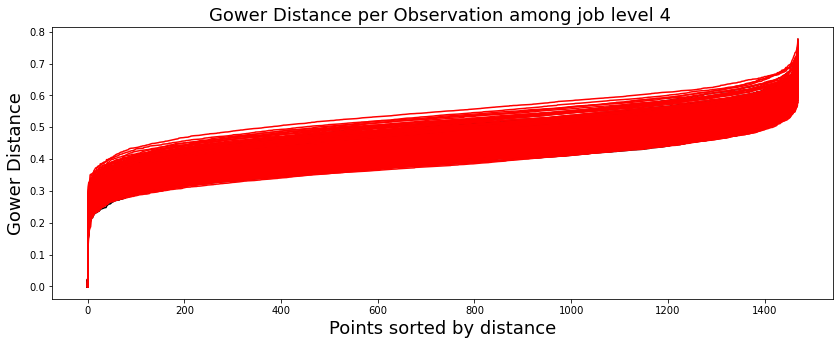

In [90]:
fig = plt.figure(figsize=(14, 5))

for i in data[data['JobLevel'] == 4].index.tolist():   
    plt.plot(np.sort(dist_matrix[:,i]),color='black')
    plt.xlabel('Points sorted by distance', fontsize=18)
    plt.ylabel('Gower Distance', fontsize=18)
    plt.title('Gower Distance per Observation among job level 4 ', fontsize=18)


for i in list(np.where(labels==-1)[0]):
    plt.plot(np.sort(dist_matrix[:,i]),color='red')
plt.show()

### Outliers identified

In [65]:
for i in np.where(labels==-1):
    print(data.iloc[i,:].T)

                                 1301
Age                                58
Attrition                          No
BusinessTravel             Non-Travel
DailyRate                         350
Department                      Sales
DistanceFromHome                    2
Education                    Bachelor
EducationField                Medical
EnvironmentSatisfaction        Medium
Gender                           Male
HourlyRate                         52
JobInvolvement                   High
JobLevel                            4
JobRole                       Manager
JobSatisfaction                Medium
MaritalStatus                Divorced
MonthlyIncome                   16291
MonthlyRate                     22577
NumCompaniesWorked                  4
OverTime                           No
PercentSalaryHike                  22
PerformanceRating         Outstanding
RelationshipSatisfaction    Very_High
StockOptionLevel                    1
TotalWorkingYears                  37
TrainingTime

### Identify rows to drop (outliers )

In [66]:
rows_to_drop = list(np.where(labels==-1)[0])
rows_to_drop

[1301]

In [67]:
data.drop(rows_to_drop,axis=0,inplace=True)

# Q3. Conduct appropriate hypothesis testing to determine the association between the features and employee monthly income 

In [70]:
critical_value= .05

##  Monthly Income vs. Categorical Features: Non-Parametric Test 

In [160]:
stat_list=[]
p_list=[]

categorical_features = list(data.describe(include=['object']).columns)
for feature in categorical_features:
    groupednumbers = {}
    for grp in data[feature].unique(): 
        groupednumbers[grp] = data['MonthlyIncome'][data[feature]==grp].values

    args = groupednumbers.values()
    stat, p = stats.kruskal(*args)
    
    stat_list.append(stat)
    p_list.append(p)

df1_non_parametric=pd.DataFrame({'Categorical Features': categorical_features,'Kruskal Test':stat_list,'p_value':p_list})
df1_non_parametric.sort_values(by='Kruskal Test',ascending=False,inplace=True)
df1_non_parametric.round(3)    

,Categorical Features,Kruskal Test,p_value
8,JobRole,1071.923,0.000
0,Attrition,57.566,0.000
2,Department,42.017,0.000
3,Education,27.618,0.000
4,EducationField,24.940,0.000
10,MaritalStatus,12.090,0.002
6,Gender,3.015,0.082
14,WorkLifeBalance,2.085,0.555
1,BusinessTravel,1.377,0.502
12,PerformanceRating,1.268,0.260


##  Monthly Income vs. Categorical Features: Parametric Test 

In [159]:
stat_list=[]
p_list=[]

categorical_features = list(data.describe(include=['object']).columns)

for feature in categorical_features:
    groupednumbers = {}
    for grp in data[feature].unique(): 
        groupednumbers[grp] = data['MonthlyIncome'][data[feature]==grp].values

    args = groupednumbers.values()
    stat, p = stats.f_oneway(*args)
    
    stat_list.append(stat)
    p_list.append(p)

df1_parametric=pd.DataFrame({'Categorical Features': categorical_features,'ANOVA test':stat_list,'p_value':p_list})
df1_parametric.sort_values(by='ANOVA test',ascending=False,inplace=True)
df1_parametric.round(3)    

,Categorical Features,ANOVA test,p_value
8,JobRole,806.870,0.000
0,Attrition,38.277,0.000
10,MaritalStatus,5.798,0.003
3,Education,3.900,0.004
2,Department,3.013,0.049
4,EducationField,1.977,0.079
6,Gender,1.606,0.205
1,BusinessTravel,1.239,0.290
14,WorkLifeBalance,0.629,0.596
12,PerformanceRating,0.617,0.432


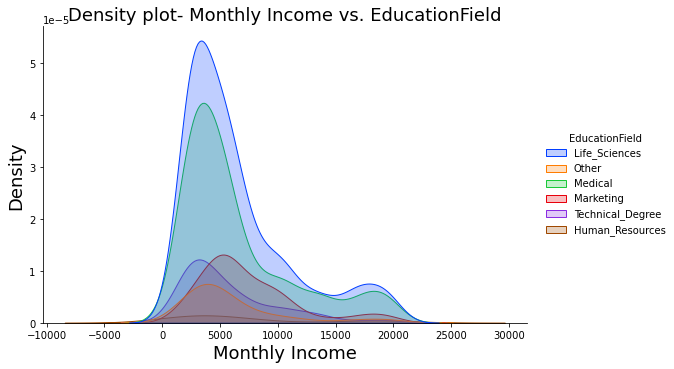

In [161]:
sns.displot(data=data, x='MonthlyIncome', hue='EducationField', kind='kde', fill=True, palette=sns.color_palette('bright')[:len(data['EducationField'].unique())], height=5, aspect=1.5)
plt.xlabel('Monthly Income', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.title('Density plot- Monthly Income vs. EducationField', fontsize=18)
plt.show()

In [162]:
### Identify non-significant numeric features 
significant_categorical_nonpar = df1_non_parametric[df1_non_parametric['Kruskal Test']>1]
significant_categorical_nonpar

,Categorical Features,Kruskal Test,p_value
8,JobRole,1071.923321,4.430895e-226
0,Attrition,57.566121,3.268063e-14
2,Department,42.016571,7.519994e-10
3,Education,27.617727,1.490763e-05
4,EducationField,24.939508,1.431314e-04
10,MaritalStatus,12.089550,2.370214e-03
6,Gender,3.015172,8.248868e-02
14,WorkLifeBalance,2.085077,5.549376e-01
1,BusinessTravel,1.377242,5.022682e-01
12,PerformanceRating,1.268116,2.601204e-01


Unlike parametric test, avg. monthly income has been found to have not difference among EducationField! 

##  Monthly Income vs. Numeric Features: Parametric Test 

In [163]:
from scipy.stats.stats import pearsonr, spearmanr

stat_list=[]
p_list=[]


Numerical_features = list(data.describe().columns)

for feature in Numerical_features:  
    stat, p = pearsonr(data['MonthlyIncome'], data[feature]) 
    
    stat_list.append(stat)
    p_list.append(p)
    
df1_non_parametric=pd.DataFrame({'Numerical Features': Numerical_features,'Pearson test':stat_list,'p_value':p_list})
df1_non_parametric.sort_values(by='Pearson test',ascending=False,inplace=True)
df1_non_parametric.round(3)

,Numerical Features,Pearson test,p_value
5,MonthlyIncome,1.000,0.000
4,JobLevel,0.950,0.000
10,TotalWorkingYears,0.772,0.000
12,YearsAtCompany,0.513,0.000
0,Age,0.496,0.000
13,YearsInCurrentRole,0.363,0.000
14,YearsSinceLastPromotion,0.342,0.000
15,YearsWithCurrManager,0.342,0.000
7,NumCompaniesWorked,0.149,0.000
6,MonthlyRate,0.033,0.203


##  Monthly Income vs. Numeric Features: Non-Parametric Test 

In [164]:
stat_list=[]
p_list=[]

Numerical_features = list(data.describe().columns)

for feature in Numerical_features:  
    stat, p = spearmanr(data['MonthlyIncome'], data[feature]) 
 
    stat_list.append(stat)
    p_list.append(p)
    
df1_parametric=pd.DataFrame({'Numericsl Features': Numerical_features,'Spearmanr test':stat_list,'p_value':p_list})
df1_parametric.sort_values(by='Spearmanr test',ascending=False,inplace=True)
df1_parametric.round(3)

,Numericsl Features,Spearmanr test,p_value
5,MonthlyIncome,1.000,0.000
4,JobLevel,0.920,0.000
10,TotalWorkingYears,0.709,0.000
0,Age,0.471,0.000
12,YearsAtCompany,0.463,0.000
13,YearsInCurrentRole,0.394,0.000
15,YearsWithCurrManager,0.364,0.000
14,YearsSinceLastPromotion,0.263,0.000
7,NumCompaniesWorked,0.190,0.000
6,MonthlyRate,0.053,0.041


### Identify non-significant numeric features 

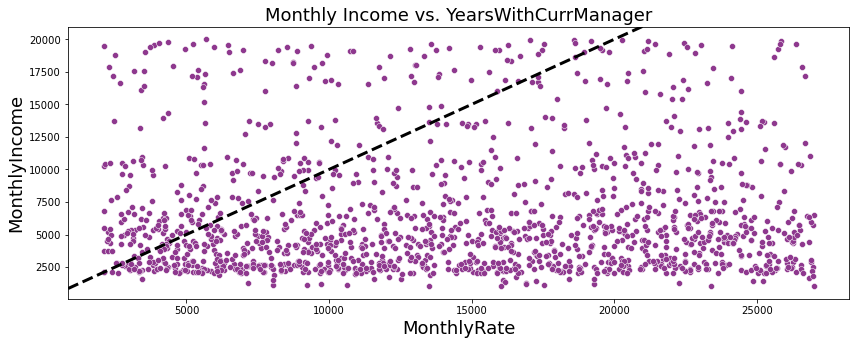

In [165]:
fig = plt.figure(figsize=(14, 5))
ax = sns.scatterplot(x=data['MonthlyRate'],y=data['MonthlyIncome'],color='#8E388E')
xpoints = ypoints = plt.xlim()
ax.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.ylabel("MonthlyIncome", fontsize=18)
plt.xlabel('MonthlyRate', fontsize=18)
plt.title("Monthly Income vs. {}".format(col), fontsize=18)
plt.show()


In [166]:
### Identify non-significant numeric features 
significant_numeric_nonpar = df1_non_parametric[df1_non_parametric['Pearson test']>.1]
significant_numeric_nonpar 

,Numerical Features,Pearson test,p_value
5,MonthlyIncome,1.000000,0.000000e+00
4,JobLevel,0.950212,0.000000e+00
10,TotalWorkingYears,0.772225,2.821625e-291
12,YearsAtCompany,0.513339,1.483993e-99
0,Age,0.496217,3.767786e-92
13,YearsInCurrentRole,0.362701,6.694537e-47
14,YearsSinceLastPromotion,0.341856,1.560870e-41
15,YearsWithCurrManager,0.341553,1.854993e-41
7,NumCompaniesWorked,0.149008,9.563141e-09


Unlike parametric test, Monthly rate has been identified has a monotic relation with Monthly income in non-parametric test. 

### Identify columns to Keep 

In [171]:
columns_to_keep = set(significant_numeric_nonpar['Numerical Features']).union(set(significant_categorical_nonpar['Categorical Features']))
columns_to_keep

{'Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'Gender',
 'JobLevel',
 'JobRole',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PerformanceRating',
 'TotalWorkingYears',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager'}

In [176]:
data_transformed = data[list(columns_to_keep)]
data_transformed

,MonthlyIncome,YearsAtCompany,WorkLifeBalance,Department,MaritalStatus,PerformanceRating,YearsSinceLastPromotion,TotalWorkingYears,JobRole,BusinessTravel,YearsInCurrentRole,EducationField,Age,Education,NumCompaniesWorked,JobLevel,Gender,YearsWithCurrManager,Attrition
0,5993,6,Bad,Sales,Single,Excellent,0,8,Sales_Executive,Travel_Rarely,4,Life_Sciences,41,College,8,2,Female,5,Yes
1,5130,10,Better,Research_Development,Married,Outstanding,1,10,Research_Scientist,Travel_Frequently,7,Life_Sciences,49,Below_College,1,2,Male,7,No
2,2090,0,Better,Research_Development,Single,Excellent,0,7,Laboratory_Technician,Travel_Rarely,0,Other,37,College,6,1,Male,0,Yes
3,2909,8,Better,Research_Development,Married,Excellent,3,8,Research_Scientist,Travel_Frequently,7,Life_Sciences,33,Master,1,1,Female,0,No
4,3468,2,Better,Research_Development,Married,Excellent,2,6,Laboratory_Technician,Travel_Rarely,2,Medical,27,Below_College,9,1,Male,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2571,5,Better,Research_Development,Married,Excellent,0,17,Laboratory_Technician,Travel_Frequently,2,Medical,36,College,4,2,Male,3,No
1466,9991,7,Better,Research_Development,Married,Excellent,1,9,Healthcare_Representative,Travel_Rarely,7,Medical,39,Below_College,4,3,Male,7,No
1467,6142,6,Better,Research_Development,Married,Outstanding,0,6,Manufacturing_Director,Travel_Rarely,2,Life_Sciences,27,Bachelor,1,2,Male,3,No
1468,5390,9,Good,Sales,Married,Excellent,0,17,Sales_Executive,Travel_Frequently,6,Medical,49,Bachelor,2,2,Male,8,No


# Q4. Does the data exhibit collinearity? If so, address it.

In [187]:
data_transformed_dummy = pd.get_dummies(data_transformed, columns=data_transformed.columns[data_transformed.dtypes=='object'], drop_first=True)

In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = data_transformed_dummy.columns
vif_data['VIF'] = [variance_inflation_factor(data_transformed_dummy[data_transformed_dummy.columns].values, i) for i in range(len(data_transformed_dummy.columns))]


In [192]:
vif_data.sort_values(by='VIF',ascending=False).head()

,feature,VIF
12,Department_Research_Development,76.404633
7,JobLevel,61.354021
0,MonthlyIncome,52.422350
13,Department_Sales,47.964123
27,EducationField_Life_Sciences,38.691977


## Dependency(collinearlity) between two numericals features

In [223]:
## list of remaining numerical featurs 
stat_list = []
p_list =[]
f1_list=[]
f2_list=[]

Numerical_features = data_transformed.describe().columns
for i in range(len(Numerical_features)):
    f1 = Numerical_features[i]
    for f2 in Numerical_features[(i+1):]:  
        stat, p = spearmanr(data[f1], data[f2]) 
        f2_list.append(f2)
        stat_list.append(stat)
        p_list.append(p)
        f1_list.append(f1)
    
    
    
df_spearman=pd.DataFrame({'F1-numeric': f1_list,'F2-numeric': f2_list,'Spearmanr test':stat_list,'p_value':p_list})
df_spearman.sort_values(by='Spearmanr test',ascending=False,inplace=True)
df_spearman

,F1-numeric,F2-numeric,Spearmanr test,p_value
6,MonthlyIncome,JobLevel,0.920266,0.000000e+00
10,YearsAtCompany,YearsInCurrentRole,0.853824,0.000000e+00
14,YearsAtCompany,YearsWithCurrManager,0.842580,0.000000e+00
24,TotalWorkingYears,JobLevel,0.734159,6.082403e-249
29,YearsInCurrentRole,YearsWithCurrManager,0.724321,3.582219e-239
2,MonthlyIncome,TotalWorkingYears,0.709485,3.224410e-225
22,TotalWorkingYears,Age,0.656223,1.212531e-181
9,YearsAtCompany,TotalWorkingYears,0.593432,1.800784e-140
8,YearsAtCompany,YearsSinceLastPromotion,0.519090,3.870621e-102
16,YearsSinceLastPromotion,YearsInCurrentRole,0.504771,8.501710e-96


In [222]:
highly_dependent_numerical =  df_spearman[(df_spearman['Spearmanr test']>.5) | (df_spearman['Spearmanr test']<-.5)]
highly_dependent_numerical

,F1-numeric,F2-numeric,Spearmanr test,p_value
6,MonthlyIncome,JobLevel,0.920266,0.000000e+00
10,YearsAtCompany,YearsInCurrentRole,0.853824,0.000000e+00
14,YearsAtCompany,YearsWithCurrManager,0.842580,0.000000e+00
24,TotalWorkingYears,JobLevel,0.734159,6.082403e-249
29,YearsInCurrentRole,YearsWithCurrManager,0.724321,3.582219e-239
2,MonthlyIncome,TotalWorkingYears,0.709485,3.224410e-225
22,TotalWorkingYears,Age,0.656223,1.212531e-181
9,YearsAtCompany,TotalWorkingYears,0.593432,1.800784e-140
8,YearsAtCompany,YearsSinceLastPromotion,0.519090,3.870621e-102
16,YearsSinceLastPromotion,YearsInCurrentRole,0.504771,8.501710e-96


In [218]:
## list of remaining numerical featurs 
cat_features = data_transformed.describe(include='object').columns
stat_list = []
p_list =[]
f1_list=[]
f2_list=[]


for i in range(len(cat_features)):
    f1 = cat_features[i]
    for f2 in cat_features[(i+1):]:  
        obs = pd.crosstab(data[f1],data[f2], margins=False)
        chi_statisticw, p_value, degree_freedom = stats.chi2_contingency(obs)[0:3]
        f2_list.append(f2)
        stat_list.append(chi_statisticw)
        p_list.append(p_value)
        f1_list.append(f1)
    
df_chisqure=pd.DataFrame({'F1-categorical': f1_list,'F2-categorical': f2_list,'Chi-S test':stat_list,'p_value':p_list})
df_chisqure.sort_values(by='Chi-S test',ascending=False,inplace=True)
df_chisqure.round(3).sort_values(by='Chi-S test',ascending=False)

,F1-categorical,F2-categorical,Chi-S test,p_value
11,Department,JobRole,2594.549,0.000
13,Department,EducationField,1025.770,0.000
31,JobRole,EducationField,864.382,0.000
34,JobRole,Attrition,85.969,0.000
32,JobRole,Education,47.504,0.038
23,MaritalStatus,Attrition,46.022,0.000
39,EducationField,Education,37.839,0.009
3,WorkLifeBalance,JobRole,27.841,0.267
18,MaritalStatus,JobRole,26.966,0.042
38,BusinessTravel,Attrition,24.025,0.000


In [225]:
highly_dependent_categorical =  df_chisqure[(df_chisqure['Chi-S test']>50) ]
highly_dependent_categorical

,F1-categorical,F2-categorical,Chi-S test,p_value
11,Department,JobRole,2594.549085,0.000000e+00
13,Department,EducationField,1025.769516,5.250993e-214
31,JobRole,EducationField,864.381599,2.061283e-155
34,JobRole,Attrition,85.968588,3.051989e-15


# Q5. Implement Tree-based regression techniques, such as Simple Tree, Random Forest (RF), Gradient Boosting Machine (GBM), and Extreme Gradient Boosting (XGB), to model employee monthly income, optimizing the model's parameters using 10-fold cross-validation and train data set (select only four parameters using your own intuition).

### Creat Dummy Features

In [227]:
data_transformed = pd.get_dummies(data_transformed, columns=data_transformed.columns[data_transformed.dtypes=='object'], drop_first=True)
data_transformed.head()

,MonthlyIncome,YearsAtCompany,YearsSinceLastPromotion,TotalWorkingYears,YearsInCurrentRole,Age,NumCompaniesWorked,JobLevel,YearsWithCurrManager,WorkLifeBalance_Best,...,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical_Degree,Education_Below_College,Education_College,Education_Doctor,Education_Master,Gender_Male,Attrition_Yes
0,5993,6,0,8,4,41,8,2,5,0,...,0,0,0,0,0,1,0,0,0,1
1,5130,10,1,10,7,49,1,2,7,0,...,0,0,0,0,1,0,0,0,1,0
2,2090,0,0,7,0,37,6,1,0,0,...,0,0,1,0,0,1,0,0,1,1
3,2909,8,3,8,7,33,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3468,2,2,6,2,27,9,1,2,0,...,0,1,0,0,1,0,0,0,1,0


## Function to evaluate performance of different model

In [228]:
def evaluate(model, Y_test, X_test,X_train,Y_train): 
    
    # predict the target on the train dataset
    predict_train = model.predict(X_train)
    mse_train = math.sqrt(mean_squared_error(Y_train, predict_train))
    print('Root Mean Squared Error(RMSE) train dataset : ', round(mse_train,2))

    # predict the target on the test dataset
    predict_test = model.predict(X_test)
    mse_test = math.sqrt(mean_squared_error(Y_test, predict_test))
    print('Mean Squared Error(RMSE) test dataset : ', round(mse_test,2))

    
    mae =  mean_absolute_error(Y_test, predict_test)
    mape = mean_absolute_percentage_error(Y_test, predict_test)
    
    print('\n Model Performance using Test Set \n -----------------------')
    print('Root Mean Squared Error(RMSE) : ${}'.format(round(mse_test,2)))
    print('Mean Absolute Error(MAE): ${}'.format(round(mae,2)))
    print('Mean Absolute Percentage Error(MAPE): {} percent'.format(round(mape,2)*100),'\n')
    
    plt.figure(figsize=(8,4))
    ax = sns.scatterplot(x=Y_test,y=predict_test,color='#8E388E')
    ax.set(xlabel='Observed ', ylabel='Predicted ')
    xpoints = ypoints = plt.xlim()
    ax.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
    plt.title('Performance Evaluation')
    plt.show()

In [244]:
# import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform, randint
from sklearn.pipeline import Pipeline
#!pip install scikit-optimize
from skopt import BayesSearchCV


X = data_transformed.loc[:,data_transformed.columns!='MonthlyIncome'].values
Y = data_transformed.loc[:, 'MonthlyIncome'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

### Tree Regression

In [351]:
tree = DecisionTreeRegressor(random_state = 42)
param_dist =  {
        'max_features': ['auto','sqrt'],
        'max_depth': (2,20),
        "criterion": ["squared_error","absolute_error"],
        "ccp_alpha" :(0,5)
    }

In [308]:
bayes_search_tree = BayesSearchCV(estimator=tree, search_spaces=param_dist, n_jobs=-1, n_iter=50,cv=10, scoring='neg_mean_absolute_error')
bayes_search_tree.fit(X_train, Y_train)

BayesSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42),
              n_jobs=-1, scoring='neg_mean_absolute_error',
              search_spaces={'ccp_alpha': (0, 5),
                             'criterion': ['squared_error', 'absolute_error'],
                             'max_depth': (2, 20),
                             'max_features': ['auto', 'sqrt']})

Best score Tree: -766.9173504543127
Best parameters Tree:OrderedDict([('ccp_alpha', 0), ('criterion', 'squared_error'), ('max_depth', 5), ('max_features', 'auto')])
Root Mean Squared Error(RMSE) train dataset :  969.61
Mean Squared Error(RMSE) test dataset :  1010.27

 Model Performance using Test Set 
 -----------------------
Root Mean Squared Error(RMSE) : $1010.27
Mean Absolute Error(MAE): $760.74
Mean Absolute Percentage Error(MAPE): 17.0 percent 



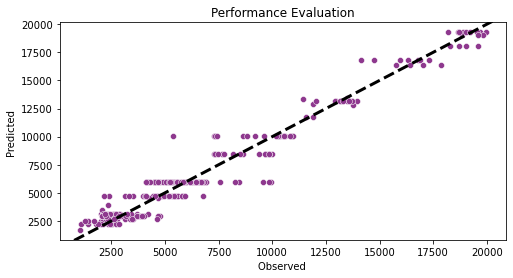

In [309]:
print(f"Best score Tree: {bayes_search_tree.best_score_}")
print(f"Best parameters Tree:{bayes_search_tree.best_params_}")
evaluate(bayes_search_tree, Y_test, X_test,X_train,Y_train)

# Random Forest

In [316]:
rf = RandomForestRegressor(random_state = 42)

In [317]:
param_dist_rf =  {
        'n_estimators': (5,100),
        'max_features': ['auto','sqrt'],
        'bootstrap': ["True","False"],
        "criterion": ["squared_error","absolute_error"],
        "ccp_alpha" :(0,5)
    }

bayes_search_rf = BayesSearchCV(estimator=rf, search_spaces=param_dist_rf, n_jobs=-1, n_iter=50,cv=10, scoring='neg_mean_absolute_error')
bayes_search_rf.fit(X_train, Y_train)

BayesSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
              n_jobs=-1, scoring='neg_mean_absolute_error',
              search_spaces={'bootstrap': ['True', 'False'],
                             'ccp_alpha': (0, 5),
                             'criterion': ['squared_error', 'absolute_error'],
                             'max_features': ['auto', 'sqrt'],
                             'n_estimators': (5, 100)})

Root Mean Squared Error(RMSE) train dataset :  916.09
Mean Squared Error(RMSE) test dataset :  1000.08

 Model Performance using Test Set 
 -----------------------
Root Mean Squared Error(RMSE) : $1000.08
Mean Absolute Error(MAE): $740.72
Mean Absolute Percentage Error(MAPE): 17.0 percent 



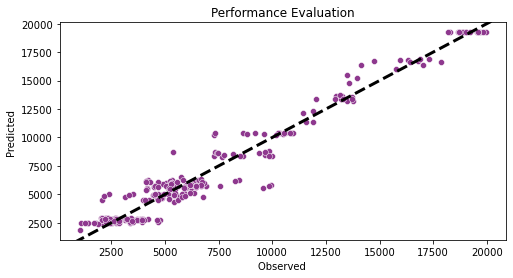

Best score RF: -754.7845707694157
Best parameters RF:OrderedDict([('bootstrap', 'True'), ('ccp_alpha', 5), ('criterion', 'absolute_error'), ('max_features', 'auto'), ('n_estimators', 94)])


In [319]:
evaluate(bayes_search_rf, Y_test, X_test,X_train,Y_train)

print(f"Best score RF: {bayes_search_rf.best_score_}")
print(f"Best parameters RF:{bayes_search_rf.best_params_}")


# GBM 

In [326]:
gbm = GradientBoostingRegressor(random_state = 42)
param_dist_gbm = {"ccp_alpha" :(0,10),
                  "max_features":['auto','sqrt'],
                  "learning_rate": (.01,3),
                  "criterion":  ["squared_error"]} ## Note you can not use ,"absolute_error" why?!! 
                    
      
bayes_search_gbm = BayesSearchCV(estimator=gbm, search_spaces=param_dist_gbm, n_jobs=-1, n_iter=50,cv=10, scoring='neg_mean_absolute_error')
bayes_search_gbm.fit(X_train, Y_train)


BayesSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
              n_jobs=-1, scoring='neg_mean_absolute_error',
              search_spaces={'ccp_alpha': (0, 10),
                             'criterion': ['squared_error'],
                             'learning_rate': (0.01, 3),
                             'max_features': ['auto', 'sqrt']})

Root Mean Squared Error(RMSE) train dataset :  705.5
Mean Squared Error(RMSE) test dataset :  1109.5

 Model Performance using Test Set 
 -----------------------
Root Mean Squared Error(RMSE) : $1109.5
Mean Absolute Error(MAE): $862.51
Mean Absolute Percentage Error(MAPE): 19.0 percent 



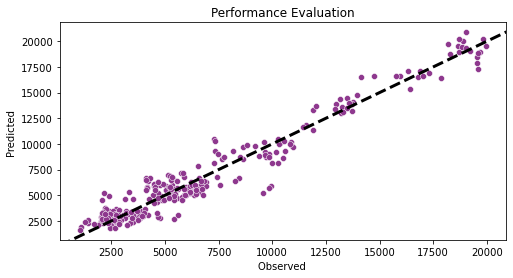

Best score GBM: -840.0012880319813
Best parameters GBM:OrderedDict([('ccp_alpha', 3), ('criterion', 'squared_error'), ('learning_rate', 0.3236661035703927), ('max_features', 'auto')])


In [327]:
evaluate(bayes_search_gbm, Y_test, X_test,X_train,Y_train)

print(f"Best score GBM: {bayes_search_gbm.best_score_}")
print(f"Best parameters GBM:{bayes_search_gbm.best_params_}")

# XGBoost (eXtreme Gradient Boosting)

In [341]:
xgbc = XGBRegressor(random_state=2)

In [342]:
param_dist_xgb = {"ccp_alpha" :(0,5),
                  "max_features":['auto','sqrt'],
                  "learning_rate": (.01,3),
                  "reg_alpha": (0,1),
                  "criterion":  ["reg:squarederror"]
                  } ## Note you can not use ,"absolute_error" why?!! 

bayes_search_xgbc = BayesSearchCV(xgbc, search_spaces=param_dist_xgb,n_iter=50, n_jobs=-1, cv=10, scoring='neg_mean_absolute_error')

bayes_search_xgbc.fit(X_train, Y_train)

[19:00:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "ccp_alpha", "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




BayesSearchCV(cv=10,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=2, reg_alpha=None,
                                     reg_lambda=None, ...),
              n_jobs=-1, scoring='neg_mean_absolute_error',
              search_spaces={'ccp_alpha': (0, 5),
                             'criterion': ['reg:squarederror'],
                             'learning_rate': (0.01, 3),
                             'max_features': ['auto', 'sqrt'],
                             'reg_alpha': (0, 1)})

Root Mean Squared Error(RMSE) train dataset :  824.56
Mean Squared Error(RMSE) test dataset :  1044.85

 Model Performance using Test Set 
 -----------------------
Root Mean Squared Error(RMSE) : $1044.85
Mean Absolute Error(MAE): $813.55
Mean Absolute Percentage Error(MAPE): 17.0 percent 



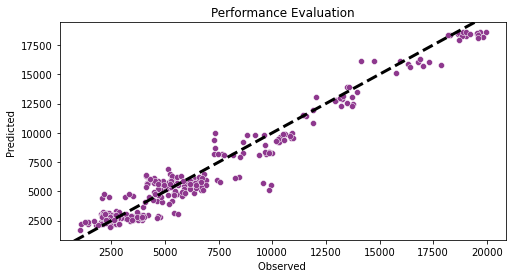

Best paramters Random Search: OrderedDict([('ccp_alpha', 4), ('criterion', 'reg:squarederror'), ('learning_rate', 0.03333674525331885), ('max_features', 'auto'), ('reg_alpha', 1)]))


In [343]:
evaluate(bayes_search_xgbc, Y_test, X_test,X_train,Y_train)

best_params = bayes_search_xgbc.best_params_
print(f"Best paramters Random Search: {best_params})")

# Q6. Discuss the sensitivity of the model's performance to those parameters

In [346]:
def sensitivity_analysis(model,param,name):
    df = pd.DataFrame(model.cv_results_)
    df.columns = [x.replace('param_','') for x in list(df.columns)]
    for key, value in param.items():   
        plt.figure(figsize=(14,5))
        sns.boxplot(x = df[key], y = df['mean_test_score'], data = df,palette="mako")
        sns.stripplot(x = df[key], y = 'mean_test_score', 
                           data=df, jitter=True,marker='o', alpha=0.5,color='black')
        plt.xlabel(key, fontsize=18)
        plt.ylabel('Mean Test Score- CV', fontsize=18)
        plt.title(name, fontsize=18)
        plt.show()

# Tree

In [355]:
#sensitivity_analysis(bayes_search_tree, param_dist,'Tree')

# RF

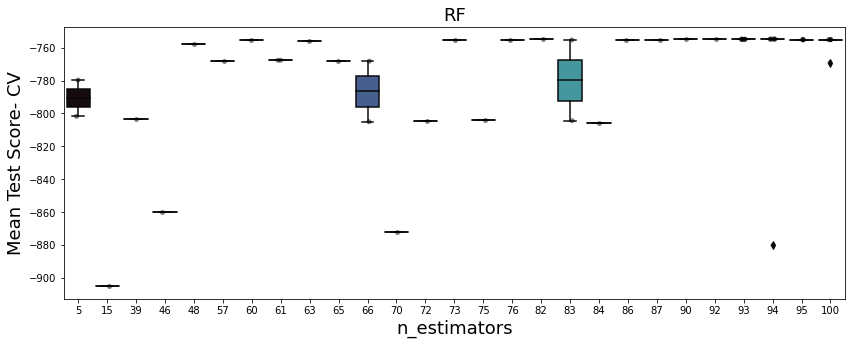

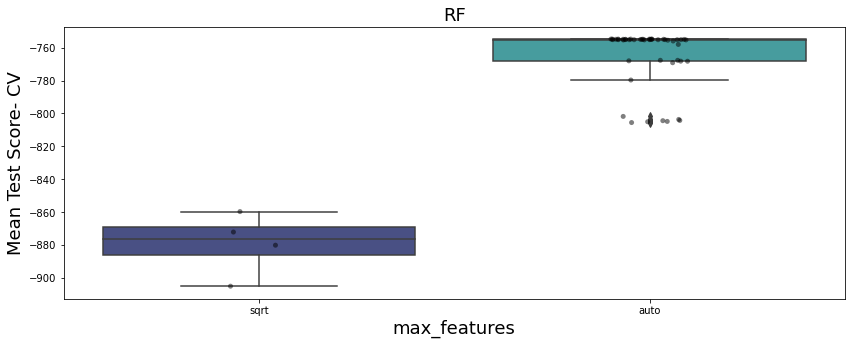

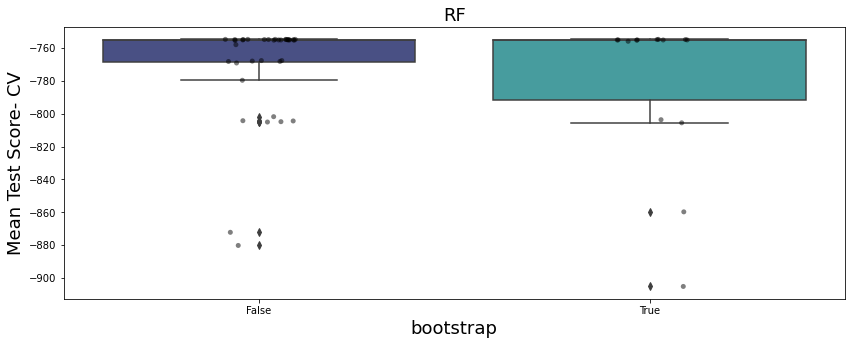

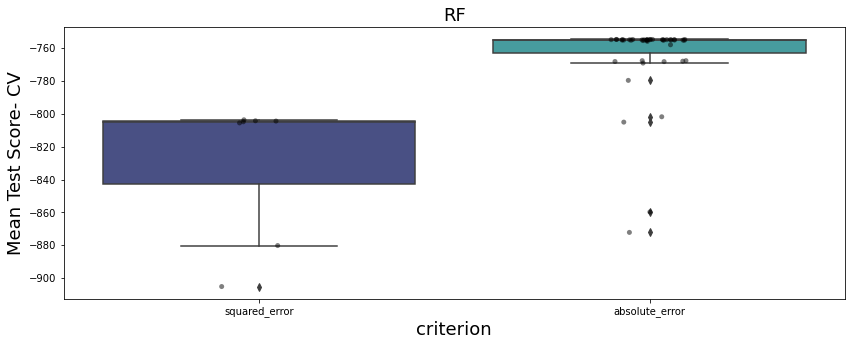

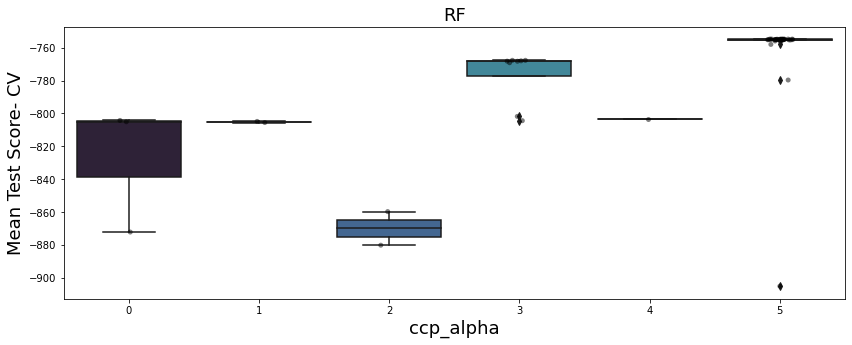

In [347]:
sensitivity_analysis(bayes_search_rf, param_dist_rf,'RF')

# GBM

In [354]:
#sensitivity_analysis(bayes_search_gbm, param_dist_gbm,'GBM')

### XGBoost

In [195]:
#sensitivity_analysis(random_search_xgbc, param_dist_xgbc,'XGBOOST')

# Q7. Compare the model's performance using evaluation metrics such as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE). Which metric(s) would you recommend using, and which model performs the best according to the chosen metric(s)?

In [357]:
models = []
models.append(('Random Forest', bayes_search_rf))
models.append(('Decision Tree Regressor', bayes_search_tree))
models.append(('XGBoost Regressor', bayes_search_xgbc))
models.append(('GBM Regressor', bayes_search_gbm))

In [394]:
neg_mean_absolute_error = []
neg_root_mean_squared_error = []
neg_median_absolute_error = []
neg_mean_absolute_percentage_error=[]    
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'MAPE','MAE', 
       'RMSE', 'Median Absolute Error' ]
df_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=5)  # 5-fold cross-validation

    cv_neg_mean_absolute_percentage_error = model_selection.cross_val_score(  
        model, X_train, Y_train, cv=kfold, scoring='neg_mean_absolute_percentage_error')
    
    cv_neg_mean_absolute_error = model_selection.cross_val_score( 
        model, X_train, Y_train, cv=kfold, scoring='neg_mean_absolute_error')

    cv_neg_root_mean_squared_error = model_selection.cross_val_score(  
        model, X_train, Y_train, cv=kfold, scoring='neg_root_mean_squared_error')

    cv_neg_median_absolute_error = model_selection.cross_val_score(  
        model, X_train, Y_train, cv=kfold, scoring='neg_median_absolute_error')
    
    neg_mean_absolute_percentage_error.append(np.multiply(cv_neg_mean_absolute_percentage_error,-1))
    neg_mean_absolute_error.append(np.multiply(cv_neg_mean_absolute_error,-1))
    neg_root_mean_squared_error.append(np.multiply(cv_neg_root_mean_squared_error,-1))
    neg_median_absolute_error.append(np.multiply(cv_neg_median_absolute_error,-1))

    
    names.append(name)
    df_results.loc[i] = [name,
                         round(np.multiply(cv_neg_mean_absolute_percentage_error,-1).mean()*100, 2),
                         round(np.multiply(cv_neg_mean_absolute_error,-1).mean(), 2),
                         round(np.multiply(cv_neg_root_mean_squared_error,-1).mean(), 2),
                         round(np.multiply(cv_neg_median_absolute_error,-1).mean() , 2)
                         ]
    i += 1
df_results.sort_values(by=['RMSE'], ascending=False)

[01:32:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "ccp_alpha", "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:39:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "ccp_alpha", "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:45:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Para

[03:35:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "ccp_alpha", "criterion", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




,Algorithm,MAPE,MAE,RMSE,Median Absolute Error
1,Decision Tree Regressor,16.27,770.45,1152.30,557.59
2,XGBoost Regressor,18.00,850.15,1141.83,708.86
3,GBM Regressor,18.24,885.10,1102.67,624.04
0,Random Forest,16.41,772.09,1073.00,537.30


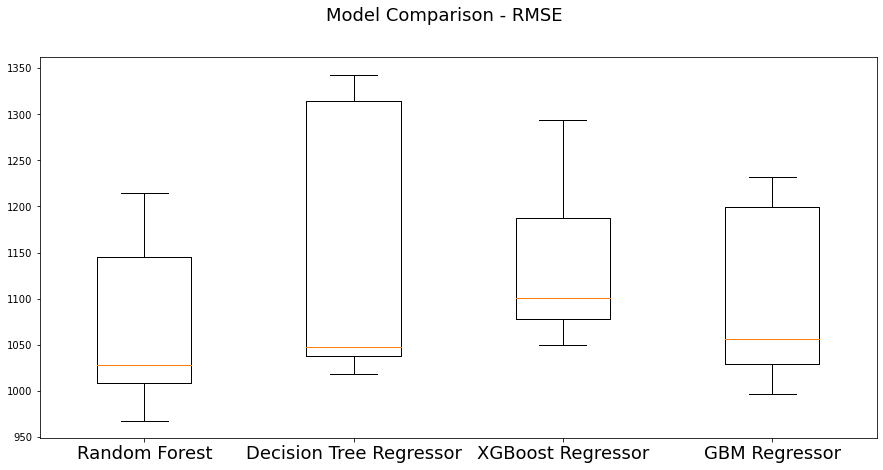

In [395]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Model Comparison - RMSE',fontsize=18)
ax = fig.add_subplot(111)
plt.boxplot(neg_root_mean_squared_error)
ax.set_xticklabels(names,fontsize=18)
plt.show()

# Q8. Determine the top ten significant variables that affect employee monthly income using the best-selected model

In [360]:
columns=data_transformed.drop('MonthlyIncome', axis=1).columns
best_estimator = bayes_search_rf.best_estimator_
best_estimator.fit(X_train, Y_train)
importances = best_estimator.feature_importances_

In [365]:
feature_importance = pd.DataFrame(columns,importances, columns=['Imprtance'])
feature_importance = feature_importance.reset_index()
feature_importance.rename(columns={'index':'Score'},inplace=True)
feature_importance.sort_values(by='Score',inplace=True, ascending =False)
feature_importance.head()

,Score,Imprtance
6,0.879111,JobLevel
2,0.039160,TotalWorkingYears
20,0.021124,JobRole_Research_Director
18,0.010690,JobRole_Manager
17,0.005480,JobRole_Laboratory_Technician


# Q9. Suppose the company adopts your model to adjust employee monthly income; what would be their anticipated cost/benefit?

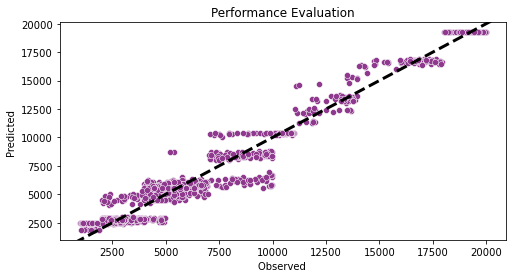

In [366]:
predicted_income = best_estimator.predict(X)
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x=Y,y=predicted_income,color='#8E388E')
ax.set(xlabel='Observed ', ylabel='Predicted ')
xpoints = ypoints = plt.xlim()
ax.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.title('Performance Evaluation')
plt.show()

In [393]:
under_paid_employees = np.where(Y<predicted_income,1,0).sum()

over_paid_employees = np.where(Y>predicted_income,1,0).sum()

print('# of under-paid employees:',under_paid_employees,'which cost $',sum(x for i, x in enumerate(predicted_income) if x < Y[i]).round() , '\n' )
print('# of over-paid employees:',over_paid_employees,'which benefit $',sum(x for i, x in enumerate(predicted_income) if x > Y[i]).round() , '\n' )
print('Cost/Saving of Adoption:',sum(x-Y[i] for i, x in enumerate(predicted_income)).round(),'\n' )

# of under-paid employees: 759 which cost $ 4647982.0 

# of over-paid employees: 710 which benefit $ 4872138.0 

Cost/Saving of Adoption: -22899.0 



# Suggest couple of strategy plan to extend employee’s retention.  

- HR should make effort to collect information on industry benchmarks to determine if the company is providing competitive wages.

- Projects scope, timeline, and required resources should be defined upfront accordingly to avoid pressure and reduce use of over time. 

- Proper  incentive as well as growth opportunities must made clearly for younger employees to increase reduce their attrition. Company’s vision to grow based on younger employee must be articulate to employees. 

- Proper solution should be made to provide support for employees living far from company such as transportation,  transportation allowance, working from home, time flexibility. 